In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scikitplot as skplt
#import seaborn as sns

import pickle


from sklearn import datasets, metrics

#import skopt
#from skopt import BayesSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import naive_bayes
from sklearn.utils import resample

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import joblib

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.display import display, HTML
from pprint import pformat
def boxprint(*args):
    for arg in args:
        display(HTML('<pre style="white-space: pre !important;">{}</pre>'.format(pformat(arg))))

In [2]:
df = pd.read_csv('creditcard.csv')

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

***PCA Features:*** In the given data, all but two of the features (Time and Amount) are PCA components, which do not require scaling (they are normalised as part of the PCA process). 

***Time:*** Number of seconds elapsed between this transaction and the first transaction in the dataset

Whilst it's not clear what the exact time the first transaction occured, the differences can be used to create time buckets which may add some information to the classification. Hourly intervals seems the most appropriate.. 

***Amount:*** The Amount column is of a larger scale compared to the other columns and is skewed by some large outliers. It is ripe for scaling. I will use the PowerTransformer scaler to also make the data more Gaussian-like.

In [20]:
df.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [867]:
df.Time = round((df.Time/3600)%24,0)

<AxesSubplot:>

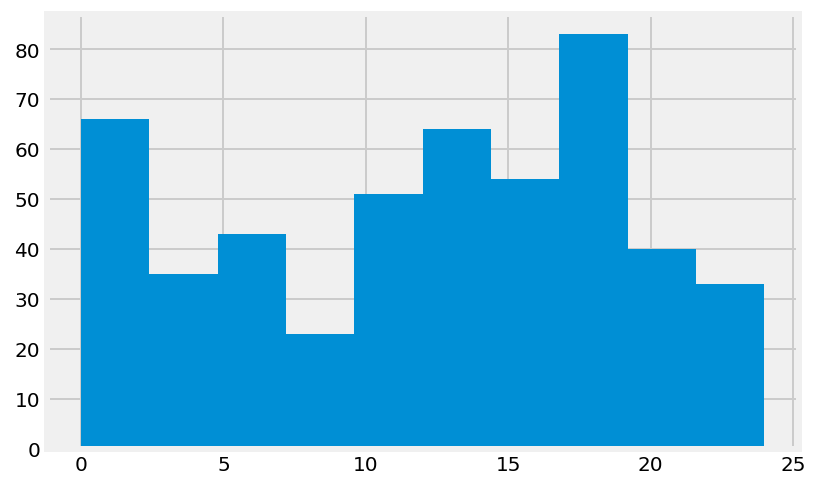

In [22]:
df[df.Class==1].Time.hist()

(array([66., 35., 43., 23., 51., 64., 54., 83., 40., 33.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

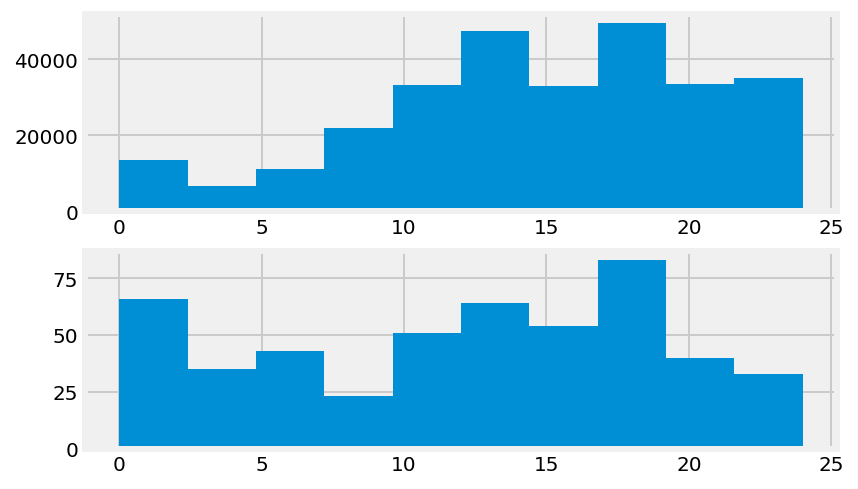

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].hist(df.Time)
axes[1].hist(df[df.Class==1].Time)

Whilst there does seem to be some difference in the hours that fraudulent transactions take place, given the small sample this may just be down to chance...

In [24]:
df[['Time','Class']].corr()

,Time,Class
Time,1.000000,-0.017213
Class,-0.017213,1.000000


Any correlation between the Time and Class is very small. To avoid having to encode the 24 hours into individual features (for very small, if any, improvement) I will ***drop 'Time' from the dataframe***..

In [3]:
df.drop(columns='Time', inplace=True)

***Amount***

In [869]:
df[['Amount','Class']].corr()

,Amount,Class
Amount,1.000000,0.005632
Class,0.005632,1.000000


As per 'Time', the 'Amount' feature actually adds only a small amound of information to the Class prediction. For the sake of practicing pipeline construction/preprocessing however, I will leave it in for now.. 

In [4]:
# Summarize statistics and see differences between fraud and normal transactions
print(f'Non-Fraud mean transaction: ${round(df[df.Class==0].Amount.mean(),2)}')
print(f'Fraudulent mean transaction: ${round(df[df.Class==1].Amount.mean(),2)}\n')

# Import the module
from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

print('\nThe low P value suggests the difference in transaction amounts between the positive and negative cases is\nstatistically significant')

Non-Fraud mean transaction: $88.29
Fraudulent mean transaction: $122.21

F: 9.033344712018891
p: 0.0026512206498171095

The low P value suggests the difference in transaction amounts between the positive and negative cases is
statistically significant


**Feature Correlations**

In [27]:
def top_corrs(df, target, display=5):
    '''Prints a sorted dataframe showing the top positively and negatively correlating variables to a given target.
    
    df = dataframe (which contains the target variable)
    target = target variable (entered as a string)
    show = number to display
    '''
    
    df = (pd.DataFrame(abs(df.select_dtypes(include=['int','float']).corr()).loc[target]).sort_values(target,ascending = False)[1:display+1])
    
    return df

In [28]:
#list the top correlated features (absolute values)
display = 20
pd.DataFrame(abs(df.select_dtypes(include=['int','float']).corr()).loc['Class']).sort_values('Class',ascending = False)[1:display+1]

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447
V18,0.111485


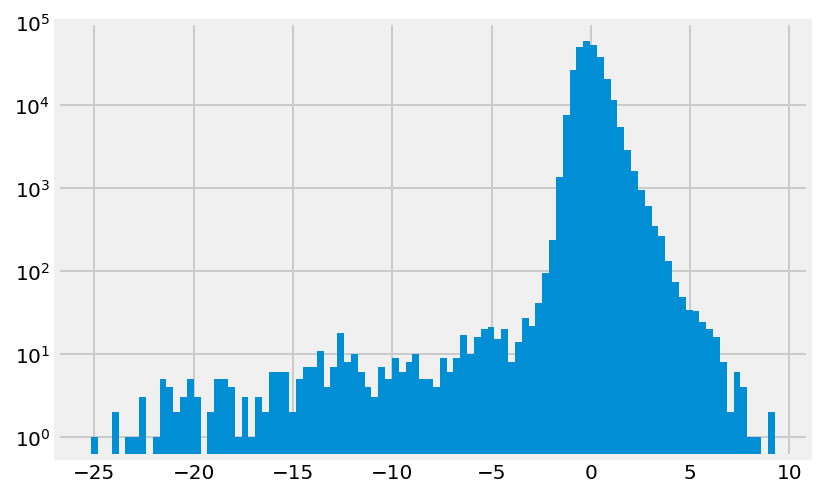

In [29]:
df.V17.hist(bins=100)
plt.yscale('log')

<AxesSubplot:>

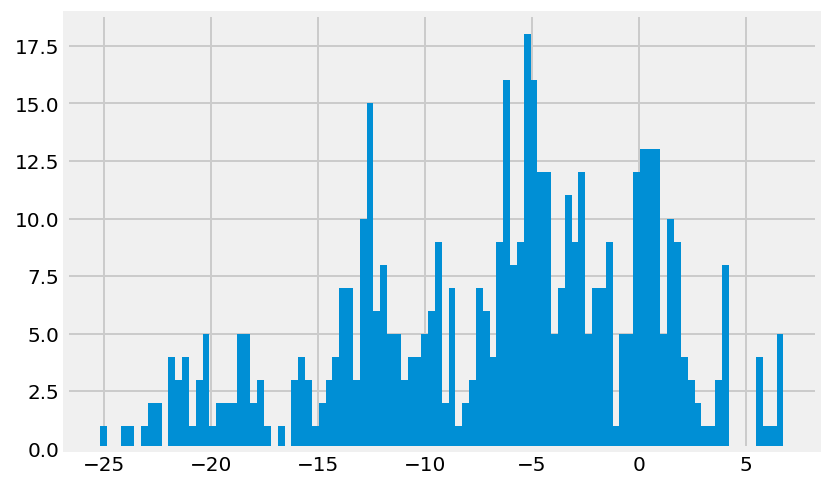

In [30]:
df[df['Class'] == 1].V17.hist(bins=100)
#plt.yscale('log')

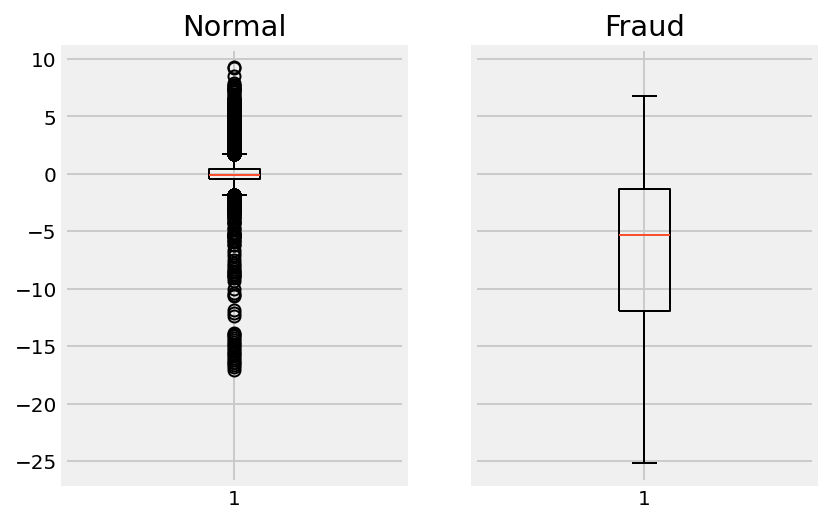

In [31]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].set_title('Normal')
ax[0].boxplot(df[df['Class'] == 0].V17)
ax[1].set_title('Fraud')
ax[1].boxplot(df[df['Class'] == 1].V17);

***Training and Test sets***

In [5]:
X = df.copy()
y = X.pop('Class')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

"Stratify=y" selected to give ~equal proportions of each Class to the training and test sets.

In [34]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [35]:
y_test.value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

***DATA PREPROCESSING***

In [7]:
from sklearn.pipeline import make_union
from sklearn.base import BaseEstimator, TransformerMixin

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

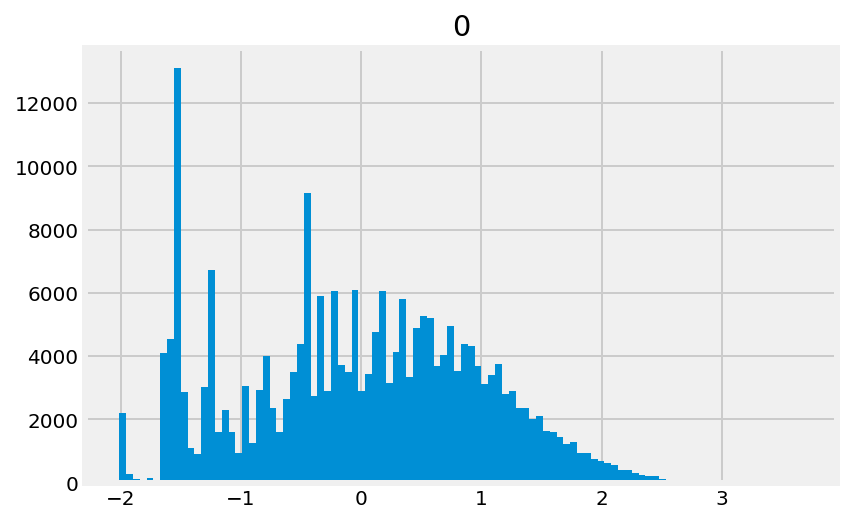

In [37]:
pd.DataFrame(PowerTransformer().fit_transform(X_train.Amount.values.reshape(-1,1))).hist(bins=100)

In [8]:
#Extract the target columns to perform scaling on...passthrough other columns untouched
preprocessor = ColumnTransformer(transformers=[('scalar', PowerTransformer(), ['Amount'])],remainder='passthrough')

In [39]:
#test preprocessor
np.isclose(preprocessor.fit_transform(X_train), 
          PowerTransformer().fit_transform(X_train.Amount.values.reshape(-1,1)))

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [676]:
preprocessor.fit_transform(X_train)

array([[ 0.5913828 ,  1.14860731, -0.00415368, ..., -0.2639544 ,
        -0.00848914, -0.01128425],
       [ 1.08835168, -0.91053837, -0.97125439, ..., -0.36692788,
        -0.13032461, -0.16183863],
       [-0.55483821,  1.22250117,  0.49190354, ..., -0.31726771,
        -0.00741709,  0.003691  ],
       ...,
       [-0.56118586,  1.98032825,  0.10442688, ..., -0.88823144,
         0.07312027, -0.00563095],
       [-0.51022373,  1.88899079, -0.19960337, ..., -1.15569622,
         0.04937677, -0.03330405],
       [ 1.42642076,  1.04365592, -1.66387039, ..., -0.47161237,
        -0.0522394 ,  0.04432858]])

In [673]:
#This class simply passes through the selected columns unchanged. 

class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=X.columns):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]


In [730]:
#pass through the PCA columns without transforming
PCA_passthru = Columns(names = [col for col in X_train.columns if col != 'Amount'])

In [731]:
#Extract the target columns to perform scaling on...
preprocessor2 = ColumnTransformer(transformers=[('scalar', PowerTransformer(), ['Amount'])])

In [732]:
#combine the two steps in a feature union
fu = make_union(preprocessor2, PCA_passthru)

In [506]:
#Note that the coolumns names have been lost... 
pd.DataFrame(fu.fit_transform(X_train)).head(2)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.591383,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,...,0.360271,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284
1,1.088352,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,...,1.073261,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839


***SCORING METRIC:***<br>
For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

Insted of our models simply outputing a class prediction, it is more useful that they generate a probability score. This will add more detail to the models, allowing better evaluation of their respective quality, and allowing us to analyse them using Precision/Recall curves for example. It will also allow us to move the threshold of the class prediction such that we can select one most appropriate to our problem.

The predicted probabilities can be accessed by calling 'predict_proba' on the trained model. However, not all of the classification models have this method, and furthermore even the ones that do may require calibrating such that the given probabilities reflect the likelihood of true events. ie. instances given an 0.80 probability of being class 1, are indeed class 1 80% of the time!

scikit-learn provides CalibratedClassifierCV which can be used to help achieve this. It also allows to add probability output to LinearSVC or any other classifier which implements decision_function method.
<br>
<br>

Models which do not have 'predict_proba', which is required for calculating the average_precision_score: 
- Support Vector Machines
- Decision Trees????
- Ensembles of Decision Trees (bagging, random forest, gradient boosting).
- k-Nearest Neighbors.

***ADD PROBABILITY CURVE (act vs calced), before and after Calibration***

In [32]:
#Before Calibration
# fit a model
model = LinearSVC()
model.fit(X_train, y_train)
# predict probabilities
probs = model.decision_function(X_test)
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=20, normalize=True)
# plot perfectly calibrated


#calibrated model
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs_cali = calibrated.predict_proba(X_test)[:, 1]
fop_cali, mpv_cali = calibration_curve(y_test, probs_cali, n_bins=10, normalize=True)

/opt/anaconda3/envs/smote_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/smote_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/smote_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/smote_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/smote_env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed

''

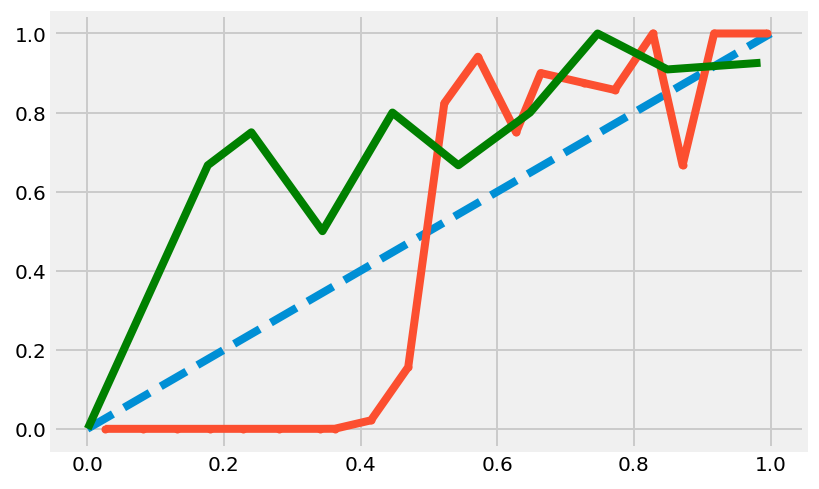

In [33]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--')
ax.plot(mpv, fop, marker='.')
ax.plot(mpv_cali, fop_cali, color='green')
;

In [34]:
#Before Calibration
# fit a model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# predict probabilities
probs = model.predict_proba(X_test)[:, 1]
# reliability diagram
fop_tree, mpv_tree = calibration_curve(y_test, probs, n_bins=30, normalize=True)
# plot perfectly calibrated

In [35]:
#calibrated model
calibrated_sigmoid = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated_sigmoid.fit(X_train, y_train)
# predict probabilities
probs_cali_sigmoid = calibrated_sigmoid.predict_proba(X_test)[:, 1]
fop_tree_sigmoid, mpv_tree_sigmoid = calibration_curve(y_test, probs_cali_sigmoid, n_bins=30, normalize=True)


In [36]:
#calibrated model
calibrated_isotonic = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated_isotonic.fit(X_train, y_train)
# predict probabilities
probs_cali_isotonic = calibrated_isotonic.predict_proba(X_test)[:, 1]
fop_tree_isotonic, mpv_tree_isotonic = calibration_curve(y_test, probs_cali_isotonic, n_bins=30, normalize=True)


''

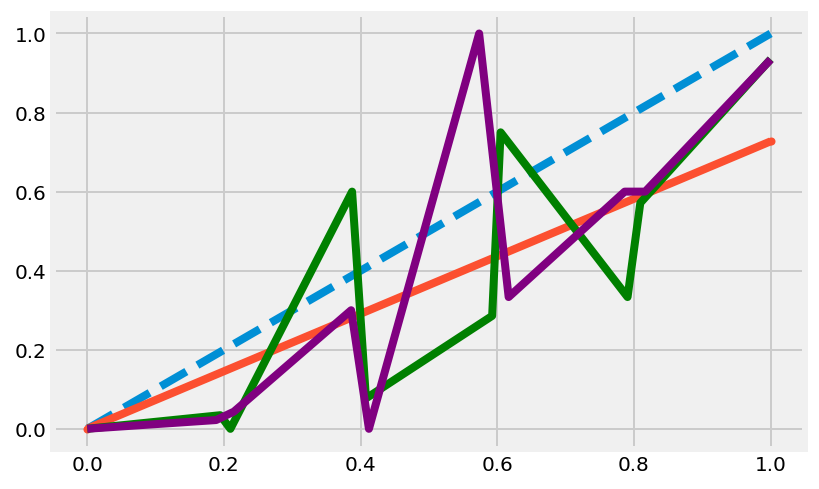

In [37]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--')
ax.plot(mpv_tree, fop_tree, marker='.')
ax.plot(mpv_tree_sigmoid, fop_tree_sigmoid, color='green')
ax.plot(mpv_tree_isotonic, fop_tree_isotonic, color='purple')
;

***PROCESS***

1. Fit a selection of classifiers on randomly undersampled data (to reduce computing time) and select the best performing models for further development/tuning.

2. Tune hyperparameters of selected best models. Compare results with resampling, probability calibration etc..

3. Try an ensemble of the top models (voting classifier) to see if this improves results

**Create a Pipeline** (preprocessing, resampling, polynomial features.. model)

In [9]:
ru = RandomUnderSampler(random_state=1)
ro = RandomOverSampler(random_state=1)
sm = SMOTE(k_neighbors=5)

In [727]:
models_dict = { 
                'Logistic_Regression': LogisticRegression(max_iter=10000, random_state=1),
                'XGBOOST': XGBClassifier(n_estimators=200, random_state=1),
                'KNN': KNeighborsClassifier(),
                'RandomForest': RandomForestClassifier(n_estimators=200, random_state=1),
                'LinearSVC': LinearSVC(max_iter=10000, random_state=1),
                'Gradient_Boosting': GradientBoostingClassifier(n_estimators=200, random_state=1),
                'Bagging_Clf': BaggingClassifier(random_state=1),
                'Naive_Bayes_NB': naive_bayes.BernoulliNB(),
                'MLP_Clf': MLPClassifier(random_state=1),
                'Decision_Tree': DecisionTreeClassifier(random_state=1)
                }

In [728]:
def model_scores(models=models_dict, resample=ru, preprocessing=fu, poly=None, calibration=None):
    '''
    Returns a dataframe of scores for a selection of models with various processing options.
    - models: a dictionary of models to be fitted
    - resample: resampling method (if any)
    - preprocessing: standardisation etc (if any)
    - poly: polynomial features (if any)
    - calibration: if used, the method of probability calibration (sigmiod, isotonic)
    '''
    
    scores = []

    for name, model in models_dict.items():
        
        #Ensure entries to the final table are succint ie. 'ru' instead of 'RandomUnderSampler(random_state=1)'
        if resample == ru:
            resample_method = 'ru'
        elif resample == ro:
            resample_method = 'ro'
        elif resample == sm:
            resample_method = 'sm'
        else:
            resample_method = 'None'
        
        
        if preprocessing == fu:
            pp = 'fu'
        else:
            pp = None
        
        
        if isinstance(poly, int):
            poly_features = PolynomialFeatures(degree=poly)
        else:
            poly_features=None
        
        
        if calibration == None:
            clf = model                                                                                   
        elif calibration == 'sigmoid':
            clf = CalibratedClassifierCV(model, method='sigmoid', cv=5)                                                                                
        elif calibration == 'isotonic':
            clf = CalibratedClassifierCV(model, method='isotonic', cv=5)
        else:
            pass
        
        
        pipe_steps = [('resample', resample), ('preprocessing', preprocessing), ('poly', poly_features), 
                      ('classifier', clf)]
                                                                                             
        try:
            pipe = Pipeline(steps=pipe_steps)

            pipe.fit(X_train, y_train)
                                                                                                 
            predictions_train = pipe.predict(X_train)
            predictions_test = pipe.predict(X_test)

            try:
                probabilities_train = pipe.predict_proba(X_train)[:,1]
                probabilities_test = pipe.predict_proba(X_test)[:, 1]  #extract the probabilities of the +ve class only
            except:
                probabilities_train = pipe.decision_function(X_train)
                probabilities_test = pipe.decision_function(X_test)

            scoring = cross_validate(pipe, X_train, y_train, cv=cv, scoring=('f1_macro', 'accuracy', 'recall', 'average_precision'))

            fit_time = scoring['fit_time'].mean()
            f1_macro = scoring['test_f1_macro'].mean()
            recall = scoring['test_recall'].mean()
            avg_prec = scoring['test_average_precision'].mean()

            #training scores
            train_recall_score = recall_score(y_train, predictions_train)
            train_avg_precision = average_precision_score(y_train, probabilities_train)

            scores.append((name, resample_method, pp, poly, calibration, round(fit_time,2), round(f1_macro,3), round(recall,3), round(avg_prec,3), 
                          round(train_recall_score,3),
                          round(train_avg_precision,3)))
        except:
            print(f'Unable to calculate {name}')

    return pd.DataFrame(scores, columns = ['Model', 'resampling', 'pp', 'poly', 'calibration', 'fit_time', 'f1_macro', 'recall', 'avg_precision','Recall_train',
                                                 'avg_precision_train'])

In [ ]:
base_scores = model_scores(resample=None, preprocessing=None, poly=None, calibration=None)

In [ ]:
ru_scores = model_scores(resample=ru, preprocessing=None, poly=None, calibration=None)

In [ ]:
ro_scores = model_scores(resample=ro, preprocessing=None, poly=None, calibration=None)

In [ ]:
cali_scores = model_scores(resample=None, preprocessing=None, poly=None, calibration='sigmoid')

In [ ]:
ru_cali_scores = model_scores(resample=ru, preprocessing=None, poly=None, calibration='sigmoid')

In [ ]:
pp_ru_scores = model_scores(resample=ru, preprocessing=fu, poly=None, calibration=None)

In [ ]:
pp_ru_cali_scores = model_scores(resample=ru, preprocessing=fu, poly=None, calibration='sigmoid')

In [ ]:
pp_ru_isocali_scores = model_scores(resample=ru, preprocessing=fu, poly=None, calibration='isotonic')

In [742]:
preprocessor.fit_transform(X_train)

array([[ 0.5913828 ,  1.14860731, -0.00415368, ..., -0.2639544 ,
        -0.00848914, -0.01128425],
       [ 1.08835168, -0.91053837, -0.97125439, ..., -0.36692788,
        -0.13032461, -0.16183863],
       [-0.55483821,  1.22250117,  0.49190354, ..., -0.31726771,
        -0.00741709,  0.003691  ],
       ...,
       [-0.56118586,  1.98032825,  0.10442688, ..., -0.88823144,
         0.07312027, -0.00563095],
       [-0.51022373,  1.88899079, -0.19960337, ..., -1.15569622,
         0.04937677, -0.03330405],
       [ 1.42642076,  1.04365592, -1.66387039, ..., -0.47161237,
        -0.0522394 ,  0.04432858]])

In [743]:
fu.fit_transform(X_train)

array([[ 0.5913828 ,  1.14860731, -0.00415368, ..., -0.2639544 ,
        -0.00848914, -0.01128425],
       [ 1.08835168, -0.91053837, -0.97125439, ..., -0.36692788,
        -0.13032461, -0.16183863],
       [-0.55483821,  1.22250117,  0.49190354, ..., -0.31726771,
        -0.00741709,  0.003691  ],
       ...,
       [-0.56118586,  1.98032825,  0.10442688, ..., -0.88823144,
         0.07312027, -0.00563095],
       [-0.51022373,  1.88899079, -0.19960337, ..., -1.15569622,
         0.04937677, -0.03330405],
       [ 1.42642076,  1.04365592, -1.66387039, ..., -0.47161237,
        -0.0522394 ,  0.04432858]])

In [136]:
scores_dict1 = {'base': base_scores,
                 'ru': ru_scores,
                 'ro': ro_scores,
                 'cali': cali_scores,
                 'ru_cali': ru_cali_scores,
                 'pp_ru': pp_ru_scores,
                 'pp_ru_cali': pp_ru_cali_scores,
                 'pp_ru_isocali': pp_ru_isocali_scores}

In [10]:
path = '/Users/adampengilly/Desktop/Projects/Fraud_Detection/Fraud_pickles/'

In [51]:
'''for k,v in scores_dict1.items():
    filename = k
    with open(path+filename,'wb') as f:
        pickle.dump(v, f)'''

"for k,v in scores_dict1.items():\n    filename = k\n    with open(path+filename,'wb') as f:\n        pickle.dump(v, f)"

In [12]:
'''filename = 'scores_dict1_pickle'
with open (path+filename, 'wb') as f:
    pickle.dump(scores_dict1, f)'''

"filename = 'scores_dict1_pickle'\nwith open (path+filename, 'wb') as f:\n    pickle.dump(scores_dict1, f)"

In [14]:
filename = 'scores_dict1_pickle'
scores_dict1 = pickle.load(open(path+filename, 'rb'))

In [15]:
#Full results table
df = pd.concat(df for df in scores_dict1.values())

precision/recall curve better than roc_auc for highly imbalanced datasets https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/

In [16]:
df.sort_values('avg_precision', ascending=False)[:10]

,Model,fit_time,f1_macro,recall,avg_precision,Recall_train,avg_precision_train,resampling,pp,poly,calibration
1,XGBOOST,265.84,0.921,0.761,0.842,0.835,0.973,None,None,None,sigmoid
3,RandomForest,130.35,0.926,0.767,0.840,1.000,1.000,ro,None,None,None
1,XGBOOST,66.79,0.923,0.774,0.838,0.853,0.959,None,None,None,None
3,RandomForest,640.36,0.921,0.749,0.838,1.000,1.000,None,None,None,sigmoid
8,MLP_Clf,85.98,0.908,0.733,0.837,0.784,0.916,None,None,None,sigmoid
3,RandomForest,166.75,0.923,0.761,0.836,1.000,1.000,None,None,None,None
1,XGBOOST,109.11,0.823,0.848,0.817,1.000,0.962,ro,None,None,None
6,Bagging_Clf,179.99,0.911,0.728,0.815,0.878,0.999,None,None,None,sigmoid
8,MLP_Clf,19.23,0.905,0.739,0.800,0.802,0.892,None,None,None,None
6,Bagging_Clf,47.72,0.913,0.744,0.796,0.944,0.999,None,None,None,None


***Evaluation of the modelling steps so far...***

Comparing the model scores;

- The top 10 models to this point comprise of ***XGBOOST, RandomForest and MLP_Classifier***.
  These will be the models I will take forward for further tuning. (Bagging_Classifier also features but as this is very similar to the RandomForest algorithm I will focus solely on the latter)
<br>

- The preprocessing step does appear to improve slightly the average precision in most of the models. However, as scaling the data doesn't affect the decision tree based algorithms (XGBoost, Random Forest) I could forgo this step on these models. 
<br>

- Sigmoid Calibration also has a small positive effect on the average precision
<br>

- Isotonic calibration does not perform well here as the undersampled data is too small. May work better on the  oversampled data, at the risk of dramatically increasing processing time..

***PHASE 2 - MODEL TUNING***

***XGBOOST***

As well as tuning some of the main hyperparameters, I will compare the effect of the different resampling strategies when fitting the models.

In [154]:
caching = joblib.Memory('/Users/adampengilly/Desktop/Projects/Fraud_Detection/')

In [18]:
df[df.Model=='XGBOOST'].sort_values('avg_precision', ascending=False)

,Model,fit_time,f1_macro,recall,avg_precision,Recall_train,avg_precision_train,resampling,pp,poly,calibration
1,XGBOOST,265.84,0.921,0.761,0.842,0.835,0.973,None,None,None,sigmoid
1,XGBOOST,66.79,0.923,0.774,0.838,0.853,0.959,None,None,None,None
1,XGBOOST,109.11,0.823,0.848,0.817,1.000,0.962,ro,None,None,None
1,XGBOOST,0.26,0.533,0.919,0.697,1.000,0.752,ru,None,None,None
1,XGBOOST,0.27,0.533,0.919,0.695,1.000,0.786,ru,fu,None,None
1,XGBOOST,0.87,0.533,0.919,0.682,1.000,0.757,ru,fu,None,sigmoid
1,XGBOOST,0.87,0.534,0.919,0.680,1.000,0.760,ru,None,None,sigmoid
1,XGBOOST,0.88,0.544,0.908,0.492,1.000,0.637,ru,fu,None,isotonic


Using 'preprocessor' instead of the equvalent 'fu' which for some reason doesn't work in the gridsearch...

In [19]:
xgb_base = Pipeline(steps= [('preprocessing', preprocessor), ('model', XGBClassifier())], memory=caching)
xgb_ru = Pipeline(steps= [('sampling', ru), ('preprocessing', preprocessor), ('model', XGBClassifier())], memory=caching)
xgb_ro = Pipeline(steps= [('sampling', ro), ('preprocessing', preprocessor), ('model', XGBClassifier())], memory=caching)
xgb_sm = Pipeline(steps= [('sampling', sm), ('preprocessing', preprocessor), ('model', XGBClassifier())], memory=caching)

***XGBOOST - Base: No resampling***

Time: ~1min/fit

In [74]:
xgb_base_params = {  'model__learning_rate': [0.1],
                 'model__max_depth': [5],
                 'model__min_child_weight': [1],
                 'model__n_estimators': [700],
                 'model__random_state': [1],
                 'model__reg_lambda': [0.1],
                 'model__scale_pos_weight': [700],      #helps to account for the imbalanced classes
                 'model__subsample': [0.9]}

In [102]:
gs_xgb_base = GridSearchCV(xgb_base, xgb_base_params, cv=5, n_jobs=5, verbose=1, scoring='average_precision')

In [103]:
gs_xgb_base.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  6.4min remaining:  9.6min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  6.7min finished


In [35]:
xgb_best_base = gs_base.best_estimator_

In [48]:
def cv_scores_to_df(model='model_name', fitted_gridsearch=None):
    
    '''Takes in a user defined name and a fitted grisdearch object and returns a dataframe with the 
    cross-validation scores and fit time. Can be concatenated with the results of additional models.'''
    
    df = pd.DataFrame(fitted_gridsearch.cv_results_)
    df['model']=model
    
    return df[['model', 'mean_fit_time',
              'split0_test_score', 'split1_test_score', 'split2_test_score',
              'split3_test_score', 'split4_test_score', 'mean_test_score',
              'std_test_score']]

In [159]:
cv_results_df = cv_scores_to_df('xgb_base', gs_xgb_base)

***XGBOOST - Random Undersampling***

In [161]:
ru_params = {  'model__learning_rate': [0.1],
                 'model__max_depth': [6],
                 'model__min_child_weight': [1],
                 'model__n_estimators': [600],
                 'model__random_state': [1],
                 'model__reg_lambda': [0.2],
                 'model__scale_pos_weight': [1],
                 'model__subsample': [0.9]}

In [162]:
gs_xgb_ru = GridSearchCV(xgb_ru, ru_params, cv=5, n_jobs=5, verbose=1, scoring='average_precision')

In [163]:
gs_xgb_ru.fit(X_train,y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    2.4s finished


In [95]:
gs_xgb_ru.best_score_

0.7277778621297378

In [833]:
scores_dict1['pp_ru'][scores_dict1['pp_ru'].Model=='XGBOOST']['avg_precision']

1    0.695
Name: avg_precision, dtype: float64

In [96]:
xgb_best_ru = gs_xgb_ru.best_estimator_

Tuning the hyperparameters improved the average_precision score by ~+0.03

In [160]:
cv_results_df = pd.concat([cv_results_df, cv_scores_to_df('xgb_ru', gs_xgb_ru)])
cv_results_df

,model,mean_fit_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,xgb_base,390.692718,0.832016,0.924831,0.787392,0.912806,0.844878,0.860385,0.051526
0,xgb_ru,0.707413,0.661745,0.827667,0.690273,0.774940,0.684264,0.727778,0.063028


***XGBOOST - Random Oversampling***

Fitting the oversampled data takes oncsiderably longer (~2min/fit) than the undersampled models. To reduce computation, will not search as many hyperparameters in this instance, and use the best hyperparamers fromt the undersampled gridsearch as a starting point. 

In [166]:
xgb_ro_params = {   'model__max_depth': [4],
                    'model__learning_rate': [0.1],
                    'model__n_estimators':[600],
                    'model__min_child_weight': [1],
                    'model__subsample':[0.9],           #to reduce fitting time/ help reguluarize the mfir
                    'model__reg_lambda': [0.2],
                    'model__scale_pos_weight':[1],
                    'model__random_state':[1]
                }    

In [167]:
gs_xgb_ro = GridSearchCV(xgb_ro, xgb_ro_params, cv=5, n_jobs=5, verbose=1, scoring='average_precision')

In [168]:
gs_xgb_ro.fit(X_train,y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 12.0min remaining: 18.0min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 12.2min finished


In [169]:
xgb_best_ro = gs_xgb_ro.best_estimator_

In [170]:
gs_xgb_ro.best_score_

0.8533171507594239

In [171]:
cv_results_df = pd.concat([cv_results_df, cv_scores_to_df('xgb_ro', gs_xgb_ro)])
cv_results_df

,model,mean_fit_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,xgb_base,390.692718,0.832016,0.924831,0.787392,0.912806,0.844878,0.860385,0.051526
0,xgb_ru,0.707413,0.661745,0.827667,0.690273,0.774940,0.684264,0.727778,0.063028
0,xgb_ro,720.998613,0.821913,0.917087,0.785830,0.909982,0.831773,0.853317,0.051541


***XGBOOST - SMOTE resampling***

Due to high fitting time, will fit to just one model - using the best hyperparameters from the Random Oversampling model..

In [172]:
gs_xgb_sm = GridSearchCV(xgb_sm, xgb_ro_params, cv=5, n_jobs=5, verbose=1, scoring='average_precision')

In [174]:
gs_xgb_sm.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 15.4min remaining: 23.1min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 15.5min finished


In [175]:
xgb_best_sm = gs_xgb_sm.best_estimator_

In [176]:
gs_xgb_sm.best_score_

0.8521042469241621

In [177]:
cv_results_df = pd.concat([cv_results_df, cv_scores_to_df('xgb_sm', gs_xgb_sm)])
cv_results_df

,model,mean_fit_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,xgb_base,390.692718,0.832016,0.924831,0.787392,0.912806,0.844878,0.860385,0.051526
0,xgb_ru,0.707413,0.661745,0.827667,0.690273,0.774940,0.684264,0.727778,0.063028
0,xgb_ro,720.998613,0.821913,0.917087,0.785830,0.909982,0.831773,0.853317,0.051541
0,xgb_sm,919.183486,0.808724,0.900643,0.796144,0.916047,0.838963,0.852104,0.048230


In [178]:
'''filename = 'cv_results_df'
with open(path+filename,'wb') as f:
    pickle.dump(cv_results_df, f)'''

In [179]:
best_models_dict = {
                    'xgb_base': xgb_best_base,
                    'xgb_ru': xgb_best_ru,
                    'xgb_ro': xgb_best_ro,
                    'xgb_sm': xgb_best_sm
                    }


In [32]:
best_models_dict['xgb_base']['model'].fit(X_train, y_train)

XGBClassifier(max_depth=5, missing=nan, n_estimators=700, random_state=1,
              reg_lambda=0.1, scale_pos_weight=700, subsample=0.9)

In [34]:
cross_val_score(best_models_dict['xgb_base']['model'], X_train, y_train, scoring='average_precision')

array([0.82568128, 0.92483139, 0.78739216, 0.91615142, 0.84487763])

In [180]:
'''filename = 'best_models_dict'
with open(path+filename,'wb') as f:
    pickle.dump(best_models_dict, f)'''

In [23]:
#READ IN SAVED MODELS/RESULTS

filename = 'cv_results_df'
cv_results_df = pickle.load(open(path+filename, 'rb'))

filename = 'best_models_dict'
best_models_dict = pickle.load(open(path+filename, 'rb'))

Pipeline(memory=Memory(location=/Users/adampengilly/Desktop/Projects/Fraud_Detection/joblib),
         steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scalar', PowerTransformer(),
                                                  ['Amount'])])),
                ('model',
                 XGBClassifier(max_depth=5, missing=nan, n_estimators=700,
                               random_state=1, reg_lambda=0.1,
                               scale_pos_weight=700, subsample=0.9))])

In [24]:
cv_results_df

,model,mean_fit_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,xgb_base,390.692718,0.832016,0.924831,0.787392,0.912806,0.844878,0.860385,0.051526
0,xgb_ru,0.707413,0.661745,0.827667,0.690273,0.774940,0.684264,0.727778,0.063028
0,xgb_ro,720.998613,0.821913,0.917087,0.785830,0.909982,0.831773,0.853317,0.051541
0,xgb_sm,919.183486,0.808724,0.900643,0.796144,0.916047,0.838963,0.852104,0.048230


In [355]:
from six import StringIO
import pydotplus
from sklearn.tree import expaort_graphviz

plt.rc("figure", figsize=(9, 7))

In [191]:
from xgboost import plot_tree

<AxesSubplot:>

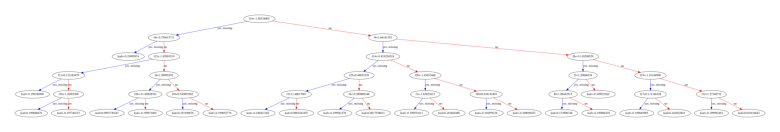

In [194]:
plot_tree(xgb_best_base['model'])

In [185]:
#First tree of xgb_best_base
test = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=1,  min_child_weight=1, reg_lambda=0.1, subsample=0.9)

In [188]:
test.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=1, reg_lambda=0.1, subsample=0.9)

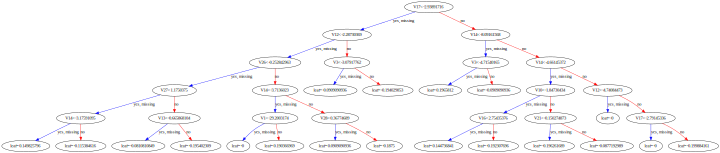

In [189]:
xgb.to_graphviz(test, num_trees=0, size="10,10")

In [104]:
def confusion_matrix(model, train=True, test=True):
    '''prints a confusion matrix and classification report for training and test data
    '''
    
    preds_train = xgb_best_base.predict(X_train)
    preds_test = xgb_best_base.predict(X_test)
    
    probs_train = xgb_best_base.predict_proba(X_train)
    probs_test = xgb_best_base.predict_proba(X_test)

    #Training
    if train==True:
        skplt.metrics.plot_confusion_matrix(y_train, preds_train, figsize=(4,4), cmap='Wistia')
        plt.show()
        print(classification_report(y_train, preds_train))
    else:
        pass

    #Test
    if test==True:
        skplt.metrics.plot_confusion_matrix(y_test, preds_test, figsize=(4,4), cmap='Greens')
        plt.show()
        print(classification_report(y_test, preds_test))
    

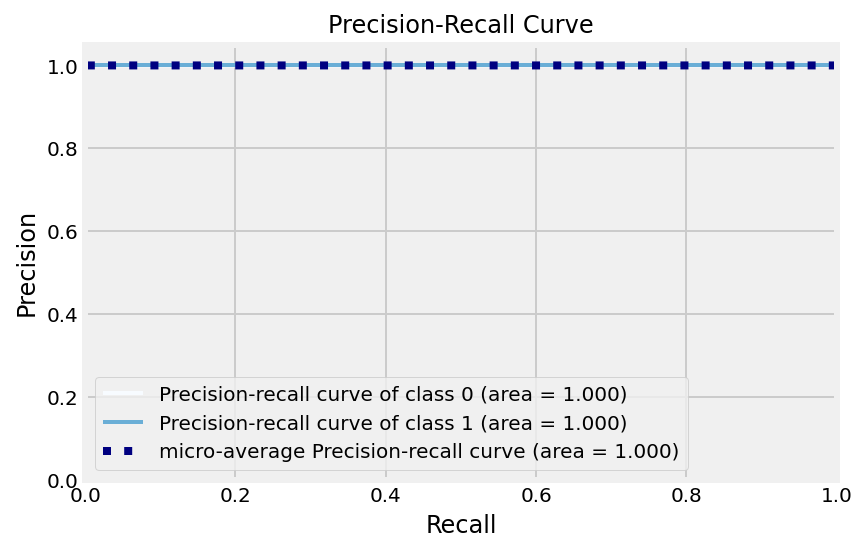

In [197]:
skplt.metrics.plot_precision_recall(y_train, probs_train, cmap='Blues')
plt.show()

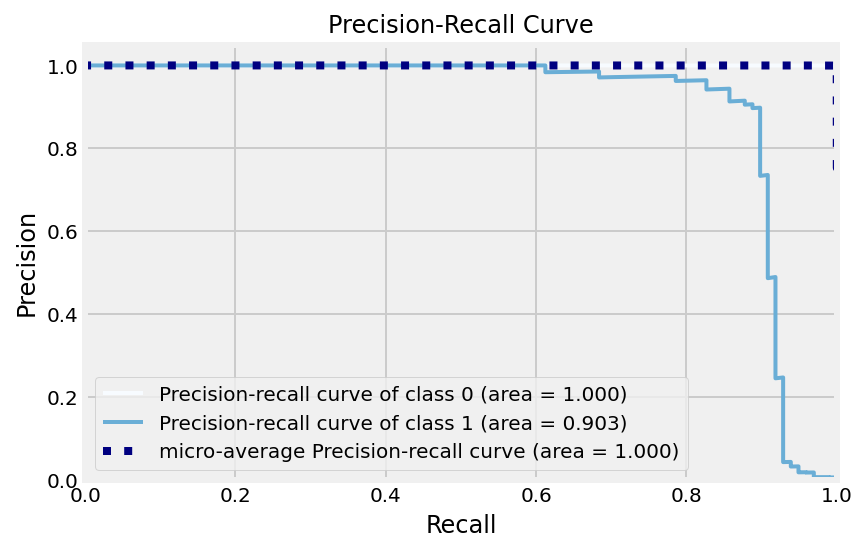

In [198]:
skplt.metrics.plot_precision_recall(y_test, probs_test, cmap='Blues')
plt.show()

In [199]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.ylim([-0.01,1.01])
    plt.legend(loc='best')

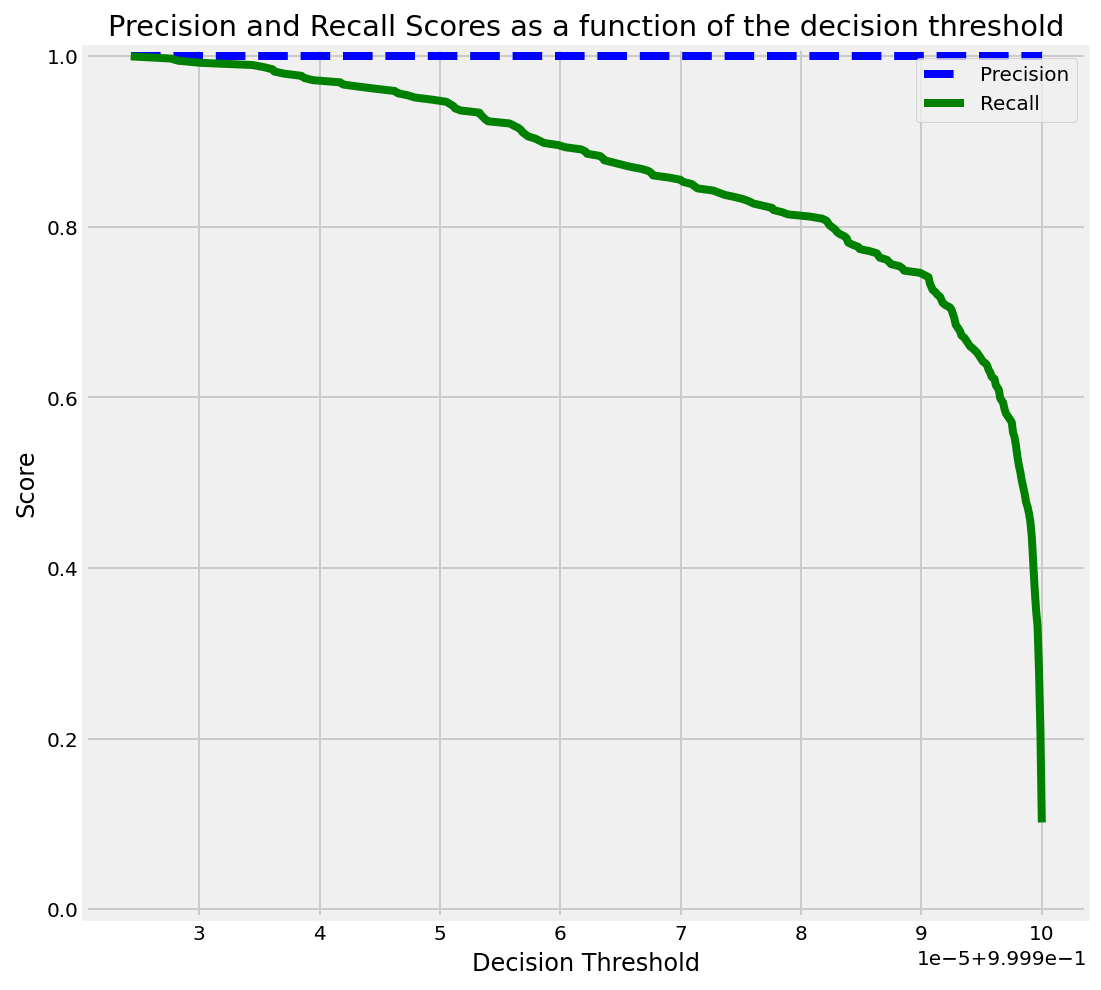

In [201]:
precisions, recalls, thresholds = precision_recall_curve(y_train, probs_train[:,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

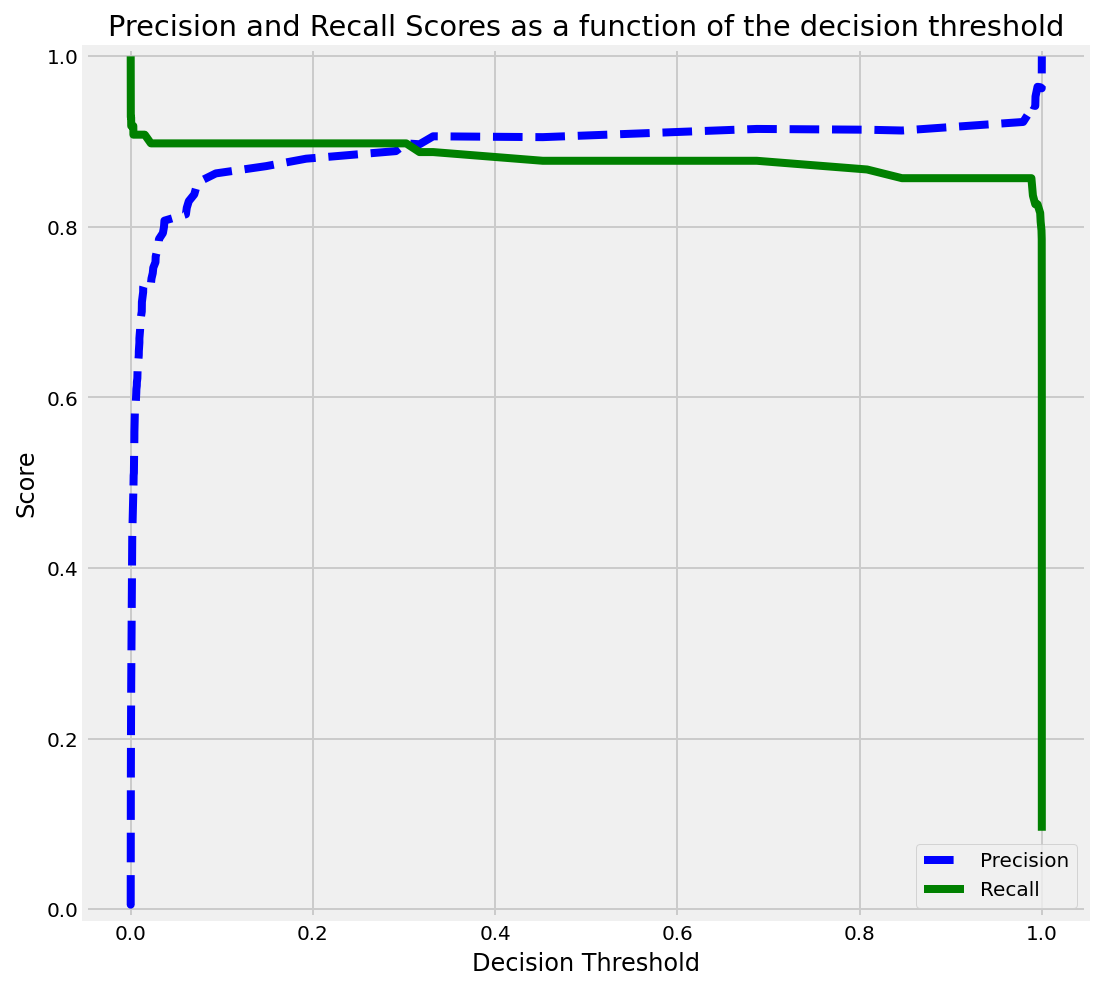

In [203]:
precisions, recalls, thresholds = precision_recall_curve(y_test, probs_test[:,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

***ADD WIDGET TO CHANGE THRESHOLD AND CALCULATE COSTS - plot onto curve(input costs of both misclassifcation and fraud)

In [70]:
#When the Pipeline is printed out in a jupyter notebook an HTML representation
#of the estimator is displayed as follows:

from sklearn import set_config
set_config(display='diagram')

In [258]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["map","error"]

In [259]:
xgb_best_base['model'].fit(X_train, y_train, 
                           early_stopping_rounds=30, eval_set=eval_set, eval_metric=eval_metric, verbose=False)

XGBClassifier(max_depth=5, n_estimators=700, random_state=1, reg_lambda=0.1,
              scale_pos_weight=700, subsample=0.9)

In [260]:
evaluation_results = xgb_best_base['model'].evals_result()

In [263]:
err_train = evaluation_results['validation_0']['error'] # Train ‘classification error’ metric
err_test = evaluation_results['validation_1']['error'] # Test ‘classification error’ metric
auc_train = evaluation_results['validation_0']['map'] # Train ‘mean_avaerage_precision’ metric
auc_test = evaluation_results['validation_1']['map'] # Test ‘mean_avaerage_precision’ metric

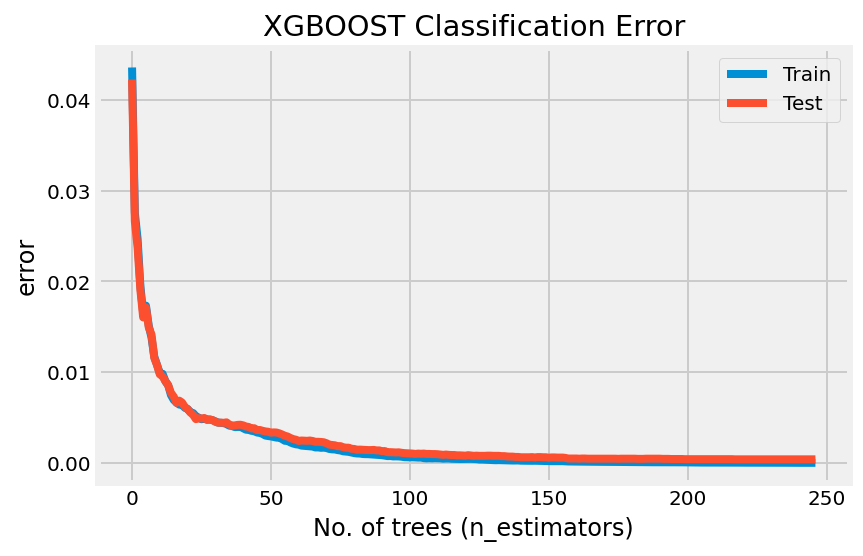

In [264]:
# Plotting ‘XGBOOST Classification Error’ and ‘XGBOOST Classification AUC’
plt.plot(err_train)
plt.plot(err_test)
plt.xlabel('No. of trees (n_estimators)')
plt.ylabel('error')
plt.legend(['Train', 'Test'])
plt.title('XGBOOST Classification Error')
plt.show()

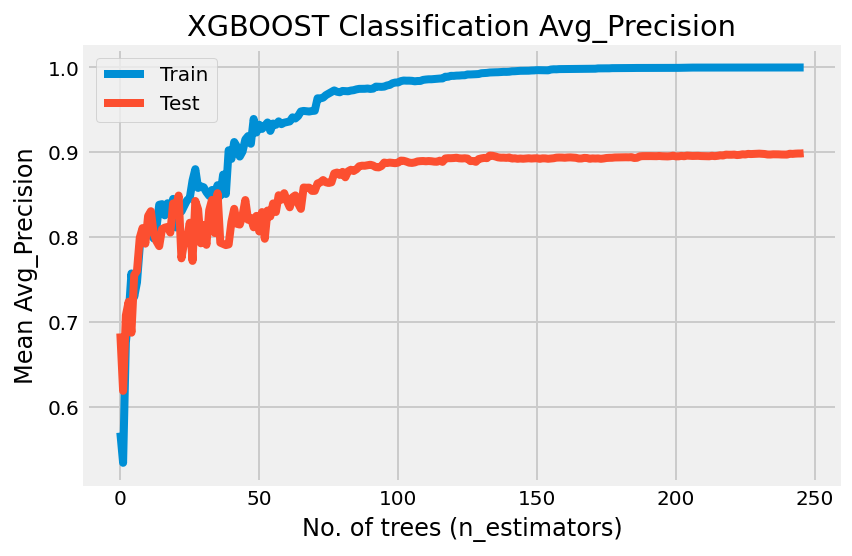

In [266]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.xlabel('No. of trees (n_estimators)')
plt.ylabel('Mean Avg_Precision')
plt.legend(['Train', 'Test'])
plt.title('XGBOOST Classification Avg_Precision')
plt.show()

Want to leave the test data alone, so will create learning curves using additional splits of the training data...

In [115]:
kf = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

In [125]:
def xgb_learning_curves(model, early_stopping_rounds=50, eval_metric=["error","map"], cv=3, X_train=X_train, y_train=y_train):

    '''Fits an XGBoost model on cross-validation splits and plots the learning curves for
    two evaluation criteria eg. classification error and 'map', for each cross-validation fold'''
    
    kf = StratifiedKFold(n_splits=cv, random_state=1, shuffle=True)

    err_train_list = []
    err_test_list=[]
    map_train_list=[]
    map_test_list=[]

    for train_index, test_index in kf.split(X_train, y_train):
        
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]

        eval_set = [(X_train_kf, y_train_kf), (X_test_kf, y_test_kf)]

        model.fit(X_train_kf, y_train_kf, 
                               early_stopping_rounds=early_stopping_rounds, eval_set=eval_set, eval_metric=eval_metric, verbose=False)

        eval_results = model.evals_result()

        err_train_list.append(eval_results['validation_0'][eval_metric[0]])
        err_test_list.append(eval_results['validation_1'][eval_metric[0]])
        map_train_list.append(eval_results['validation_0'][eval_metric[1]])
        map_test_list.append(eval_results['validation_1'][eval_metric[1]])

    #PLOTS OF EACH CROSS-VALIDATION FOLD

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
    colours=['g', 'b', 'r']

    i=0
    for data in err_train_list:
        axs[0].plot(data, color=colours[i], linewidth=1.2)
        i+=1
    i=0    
    for data in err_test_list:
        axs[0].plot(data, color=colours[i], linestyle=":", linewidth=1.2)
        i+=1

    axs[0].set_xlabel('No. of trees (n_estimators)')    
    axs[0].set_ylabel(eval_metric[0])
    axs[0].legend()
    axs[0].set_title('XGBOOST Classification Error')      

    i=0
    for data in map_train_list:
        axs[1].plot(data, color=colours[i], linewidth=1.2)
        i+=1   
    i=0    
    for data in map_test_list:
        axs[1].plot(data, color=colours[i], linestyle=":", linewidth=1.2)
        i+=1

    axs[1].set_xlabel('No. of trees (n_estimators)')    
    axs[1].set_ylabel(eval_metric[1])
    axs[1].set_title('XGBOOST Classification Avg_Precision')

    line1 = Line2D([0,1],[0,1],linestyle='-', color='black')
    line2 = Line2D([0,1],[0,1],linestyle=':', color='black')

    axs[0].legend([line1, line2],['Train', 'Test'])
    axs[1].legend([line1, line2],['Train', 'Test'])
    
    return plt.show()

TRAIN: [     0      1      3 ... 227840 227843 227844] TEST: [     2      4      5 ... 227839 227841 227842]
TRAIN: [     2      3      4 ... 227841 227842 227843] TEST: [     0      1      6 ... 227838 227840 227844]
TRAIN: [     0      1      2 ... 227841 227842 227844] TEST: [     3      7     12 ... 227835 227836 227843]


No handles with labels found to put in legend.


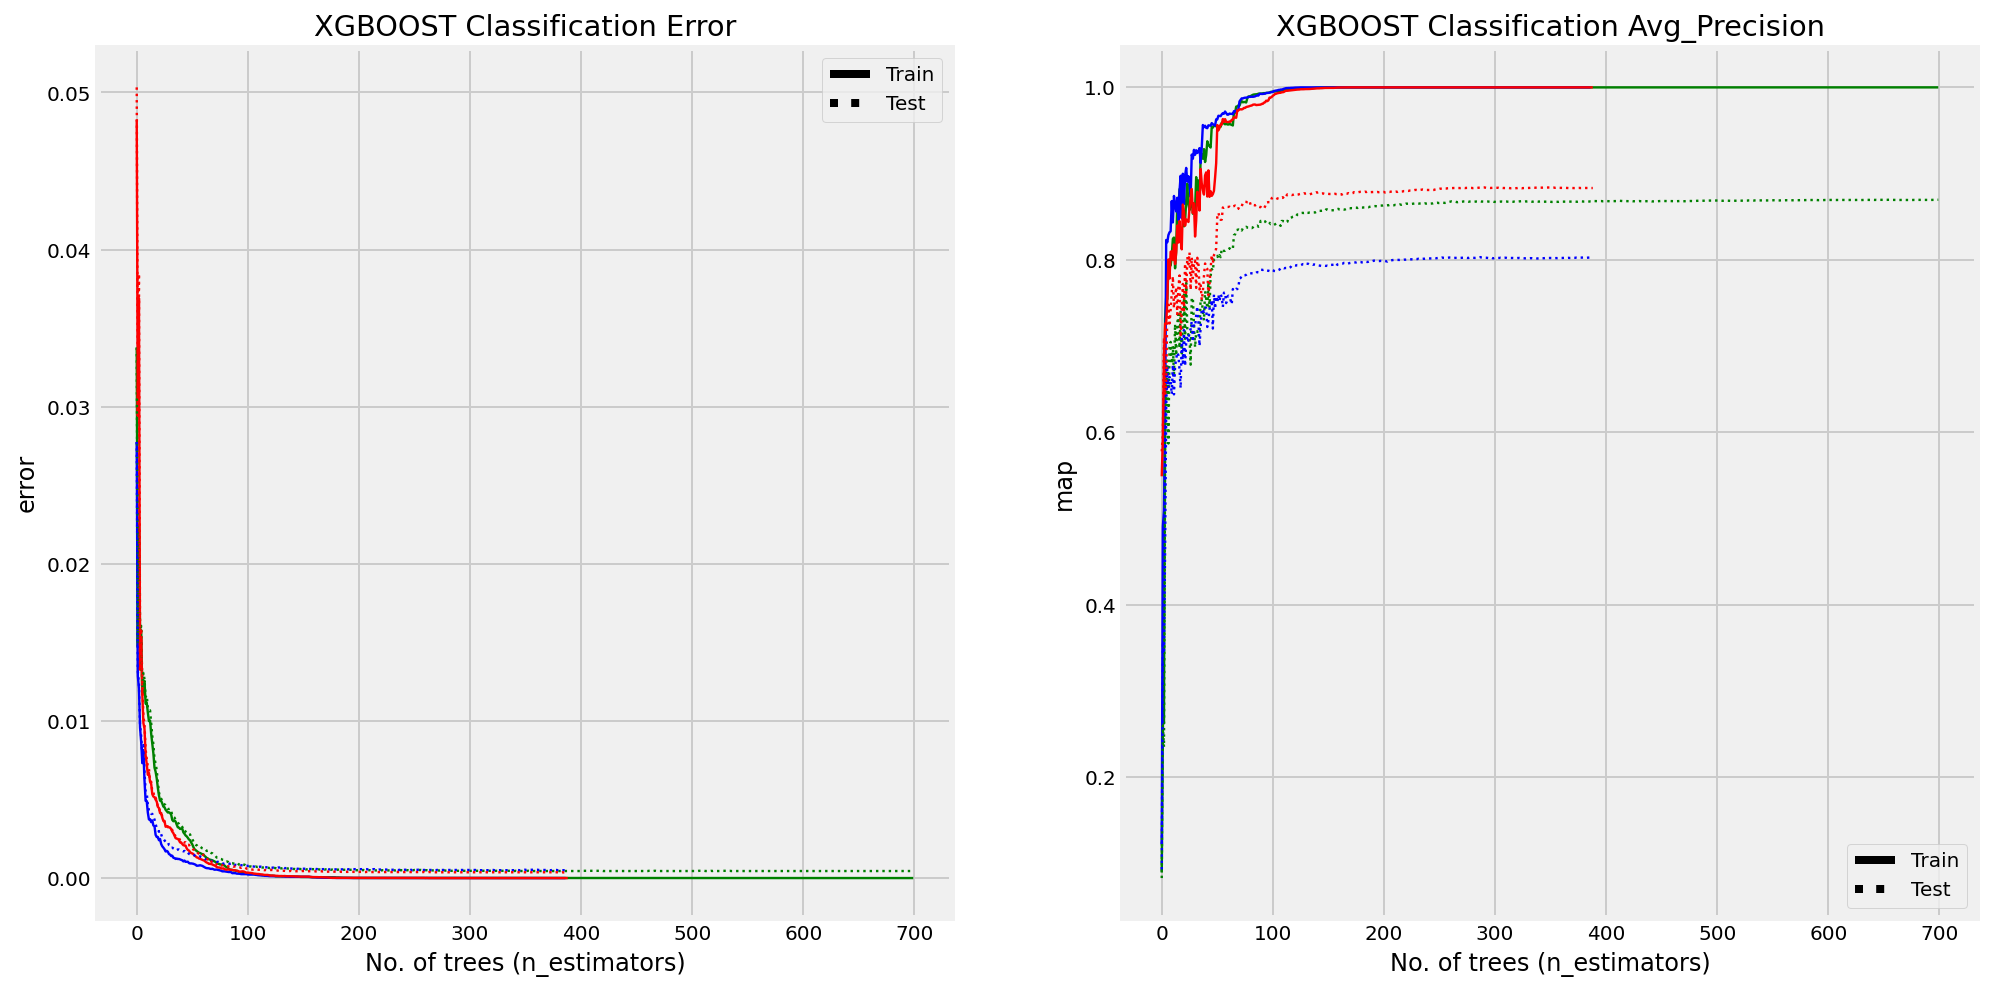

In [126]:
xgb_learning_curves(xgb_best_base, early_stopping_rounds=100)

In [106]:
#700 Estimators (Current Best XGB)
xgb = XGBClassifier(learning_rate=0.1,
              max_depth=5,
              min_child_weight=1,
              n_estimators=700,
              random_state=1,
              reg_lambda=0.1,
              scale_pos_weight=700,
              subsample=0.9)

pipe_700 = Pipeline(steps= [('preprocessing', preprocessor), ('model', xgb)])

pipe_700.fit(X_train, y_train);

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scalar', PowerTransformer(),
                                                  ['Amount'])])),
                ('model',
                 XGBClassifier(max_depth=5, n_estimators=700, random_state=1,
                               reg_lambda=0.1, scale_pos_weight=700,
                               subsample=0.9))])

In [112]:
cv_700 = cross_val_score(pipe_700, X_train, y_train, scoring='average_precision')
print('Cross validation score:', cv_700)
print('Mean cross validation score:', cv_700.mean())

Cross validation score: [0.83201637 0.92483139 0.78739236 0.91280643 0.84487763]
Mean cross validation score: 0.8603848368992983


Whilst the avg_precision score reduces slightly (n_700=0.860 vs n_160=0.848), the predictions are unchanged between the two models.

In [127]:
#350 Estimators
xgb = XGBClassifier(learning_rate=0.1,
              max_depth=5,
              min_child_weight=1,
              n_estimators=350,
              random_state=1,
              reg_lambda=0.1,
              scale_pos_weight=700,
              subsample=0.9)

pipe_350 = Pipeline(steps= [('preprocessing', preprocessor), ('model', xgb)])

pipe_350.fit(X_train, y_train);

In [129]:
cv_350 = cross_val_score(pipe_350, X_train, y_train, scoring='average_precision')
print('Cross validation score:', cv_350)
print('Mean cross validation score:', cv_350.mean())

Cross validation score: [0.83325989 0.92249665 0.78618482 0.91293655 0.84434299]
Mean cross validation score: 0.8598441793666666


Will continue by using ***n_estimators=350***. This reduces the number of trees by half, whilst having negligible impact on average_precision score (n_700=0.860 vs n_300=0.859). 

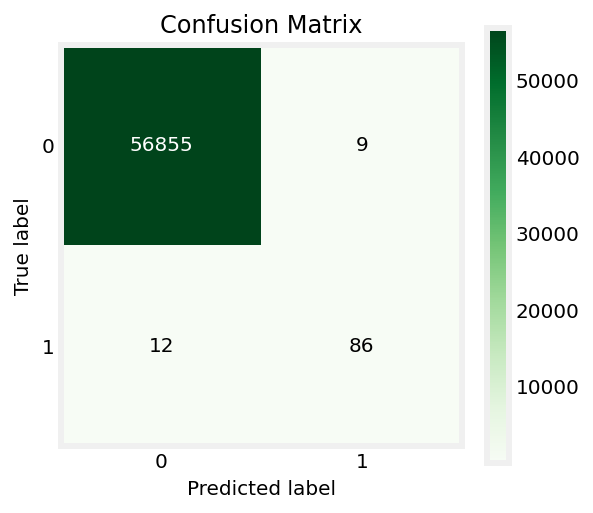

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.88      0.89        98

    accuracy                           1.00     56962
   macro avg       0.95      0.94      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [110]:
confusion_matrix(pipe_700, train=False)

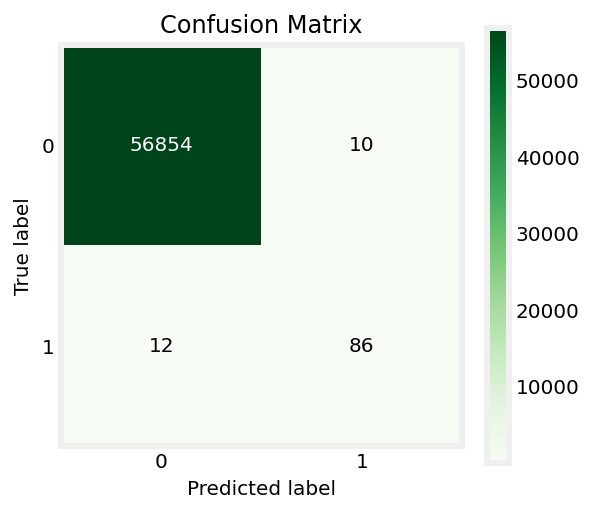

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.88      0.89        98

    accuracy                           1.00     56962
   macro avg       0.95      0.94      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [130]:
confusion_matrix(pipe_350, train=False)

In [139]:
#RE-DO GRIDSEARCH WITH PARAMETERS FOCUESED ON OVER-FITTING

xgb_base_params = {  'model__learning_rate': [0.1],
                 'model__max_depth': [5],
                 'model__min_child_weight': [0.8, 1],
                 'model__n_estimators': [350],
                 'model__random_state': [1],
                 'model__reg_lambda': [0.1],
                 'model__scale_pos_weight': [700],      #helps to account for the imbalanced classes
                 'model__subsample': [0.8, 0.9],
                 'model__colsample_bytree': [0.8, 1],
                 'model__colsample_bylevel': [0.8, 1]}


In [140]:
gs_xgb_base2 = GridSearchCV(xgb_base, xgb_base_params, cv=5, n_jobs=6, verbose=1, scoring='average_precision')

gs_xgb_base2.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 22.0min
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed: 48.7min finished


In [141]:
gs_xgb_base2.best_params_

{'model__colsample_bylevel': 1,
 'model__colsample_bytree': 1,
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__min_child_weight': 1,
 'model__n_estimators': 350,
 'model__random_state': 1,
 'model__reg_lambda': 0.1,
 'model__scale_pos_weight': 700,
 'model__subsample': 0.9}

No change in hyperparameters. 

***FINAL XGBOOST MODEL***

In [143]:
xgb_final = gs_xgb_base2.best_estimator_

In [ ]:
'''filename = 'xgb_final'
with open(path+filename,'wb') as f:
    pickle.dump(xgb_final, f)'''

filename = 'xgb_final'
xgb_final = pickle.load(open(path+filename, 'rb'))

In [ ]:
# CALIBRATE THE MODEL PROBABILITIES

In [205]:
#SIGMOID CALIBRATION
xgb_calibrated = Pipeline(steps= [('preprocessing', preprocessor), 
                                  ('model', CalibratedClassifierCV(
                                      base_estimator=XGBClassifier(learning_rate=0.1,
                                                     max_depth=5,
                                                     min_child_weight=1,
                                                     n_estimators=350,
                                                     random_state=1,
                                                     reg_lambda=0.1,
                                                     scale_pos_weight=700,
                                                     subsample=0.9),
                                       cv=5, method='sigmoid'))])

xgb_calibrated.fit(X_train, y_train);

In [193]:
#ISOTONIC CALIBRATION
xgb_iso_calibrated = Pipeline(steps= [('preprocessing', preprocessor), 
                                  ('model', CalibratedClassifierCV(
                                      base_estimator=XGBClassifier(learning_rate=0.1,
                                                     max_depth=5,
                                                     min_child_weight=1,
                                                     n_estimators=350,
                                                     random_state=1,
                                                     reg_lambda=0.1,
                                                     scale_pos_weight=700,
                                                     subsample=0.9),
                                       cv=5, method='isotonic'))])

xgb_iso_calibrated.fit(X_train, y_train);

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scalar', PowerTransformer(),
                                                  ['Amount'])])),
                ('model',
                 CalibratedClassifierCV(base_estimator=XGBClassifier(max_depth=5,
                                                                     n_estimators=350,
                                                                     random_state=1,
                                                                     reg_lambda=0.1,
                                                                     scale_pos_weight=700,
                                                                     subsample=0.9),
                                        cv=5, method='isotonic'))])

In [ ]:
'''filename = 'xgb_calibrated_models_list'
with open(path+filename,'wb') as f:
    pickle.dump(xgb_calibrated_models_list, f)'''

filename = 'xgb_final'
xgb_final = pickle.load(open(path+filename, 'rb'))

In [199]:
def calibration_plot(uncali_model, cali_model, X=X_train, y=y_train, probabilities='predict_proba', n_bins=5):

    # predict probabilities
    if probabilities=='predict_proba':
        probs = uncali_model.predict_proba(X)[:, 1]
        probs_cali = cali_model.predict_proba(X)[:, 1]
    
    elif probabilities=='decision_function':
        probs = uncali_model.decision_function(X)[:, 1]
        probs_cali = cali_model.decision_function(X)[:, 1]
    
    
    # reliability diagram
    fop, mpv = calibration_curve(y, probs, n_bins=n_bins, normalize=True)

    #calibrated model
    fop_cali, mpv_cali = calibration_curve(y, probs_cali, n_bins=n_bins, normalize=True)

    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.plot(mpv, fop, marker='.')
    ax.plot(mpv_cali, fop_cali, color='green')
    ax.legend(['Perfectly Calibrated','Non-Calibrated Model','Calibrated Model']);

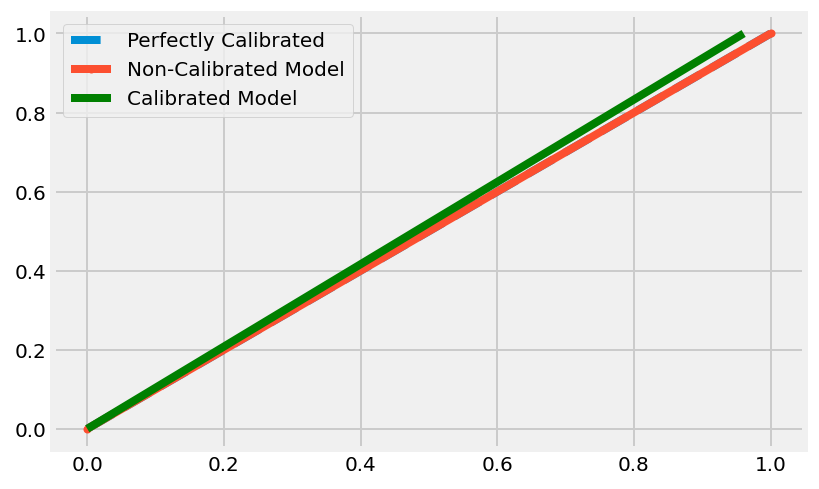

In [206]:
calibration_plot(xgb_final, xgb_calibrated, n_bins=4)

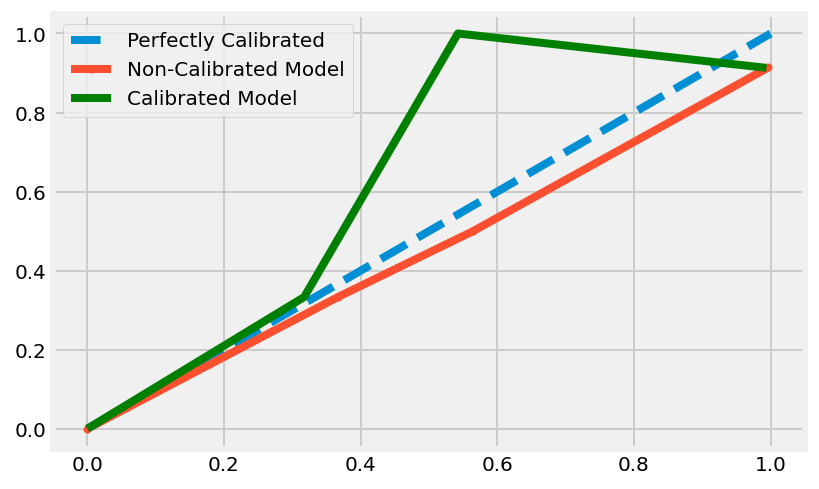

In [208]:
calibration_plot(xgb_final, xgb_calibrated, X=X_test, y=y_test, n_bins=4)

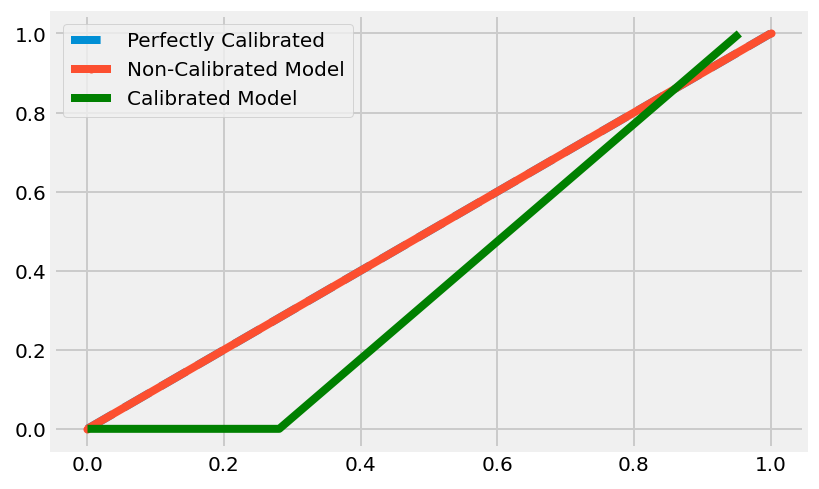

In [202]:
#TRAINING DATA
calibration_plot(xgb_final, xgb_iso_calibrated, n_bins=4)

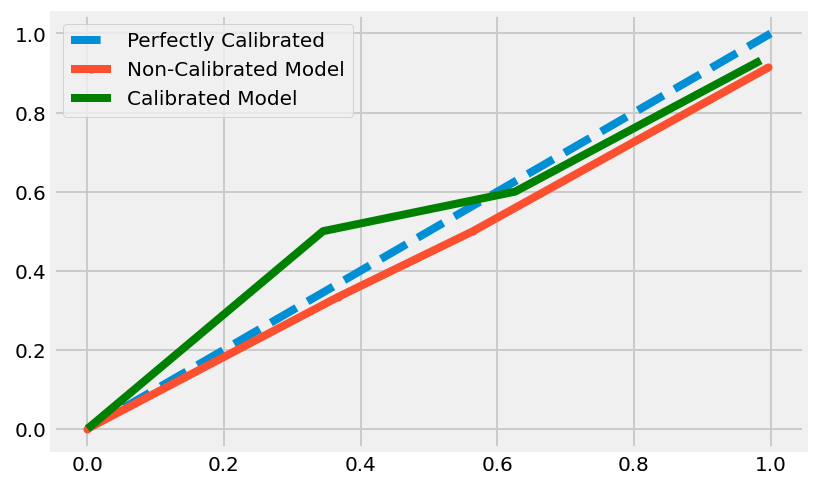

In [201]:
#TEST-DATA
calibration_plot(xgb_final, xgb_iso_calibrated, X=X_test, y=y_test, n_bins=4)

In [209]:
xgb_calibrated_models_list = [xgb_calibrated, xgb_iso_calibrated]

In [146]:
xgb_final

Pipeline(memory=Memory(location=/Users/adampengilly/Desktop/Projects/Fraud_Detection/joblib),
         steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scalar', PowerTransformer(),
                                                  ['Amount'])])),
                ('model',
                 XGBClassifier(max_depth=5, n_estimators=350, random_state=1,
                               reg_lambda=0.1, scale_pos_weight=700,
                               subsample=0.9))])

**RANDOM FOREST**